# Attention!
Данный ноутбук не содержит сделанного задания  
Что удалось до дедлайна:
- использовать алгоритм Преобразования Хафа из cv2 и повернуть изображение - бэйзлайн.
- По сути взять код с википедии для БПХ и попытаться достать от туда ту самую alfa поворота. Не получилось.
- Дальше, если получится/будет время я обновлю ноутбук с нормальным работающим решением, эфективным по памяти

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
images = [mpimg.imread(f'./data/{i}.jpg') for i in range(1, 11)]

In [8]:
def show_img(img, ax=plt):
    if len(img.shape) == 2:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)

In [9]:
print([images[i].shape for i in range(10)])

[(1100, 1954, 3), (900, 1598, 3), (1500, 2664, 3), (1000, 1776, 3), (1200, 2131, 3), (800, 1421, 3), (2648, 1922, 3), (3678, 3089, 3), (3678, 3089, 3), (2926, 2143, 3)]


In [10]:
def make_cv2_haf(src, th=500, do_print=True, get_lines=False):
    dst = cv2.Canny(src, 50, 200, None, 3)

    # Copy edges to the images that will display the results in BGR
    cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(dst, 1, np.pi / 180, th, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            if do_print:
                print(lines[i])
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (0,0,255), 3, -1)
    u, indices = np.unique(lines[:,0,1], return_inverse=True)
    res = u[np.argmax(np.bincount(indices))]
    print(res)
    if get_lines:
        return lines[0][0][1], lines[:,0,:]
    else:
        return lines[0][0][1]
make_cv2_haf(images[0], th=300, get_lines=True, do_print=False)

1.8151424


(1.8151424,
 array([[ 90.       ,   1.8151424],
        [154.       ,   1.8151424],
        [ 25.       ,   1.8151424],
        [-39.       ,   1.8151424],
        [449.       ,   1.7976891],
        [114.       ,   1.8151424],
        [ 92.       ,   1.8151424],
        [220.       ,   1.8151424],
        [237.       ,   1.8151424],
        [351.       ,   1.8151424],
        [318.       ,   1.7976891],
        [-20.       ,   1.8151424]], dtype=float32))

In [ ]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

[1.40703609e+09 1.41143362e+09 1.41561751e+09 ... 1.30835825e+09
 1.33215261e+09 1.36955151e+09]
2632212545.488638
299
Algo rotate: -18.720703125
[5.39763666e+08 5.03819434e+08 5.00103226e+08 ... 5.41199093e+08
 5.37665317e+08 5.45911224e+08]
621106857.6909778
778
Algo rotate: 113.37890625
[2.93756604e+08 2.55356823e+08 2.57358213e+08 ... 3.55512618e+08
 3.27513594e+08 3.13232435e+08]
3431238451.1421275
531
Algo rotate: 181.669921875
[8.67994282e+07 9.02342467e+07 9.27963022e+07 ... 1.29510303e+08
 1.13671052e+08 9.59481938e+07]
514460260.2223118
218
Algo rotate: 244.16015625
0.7853982
CV2 rotate: 7.000000052497138


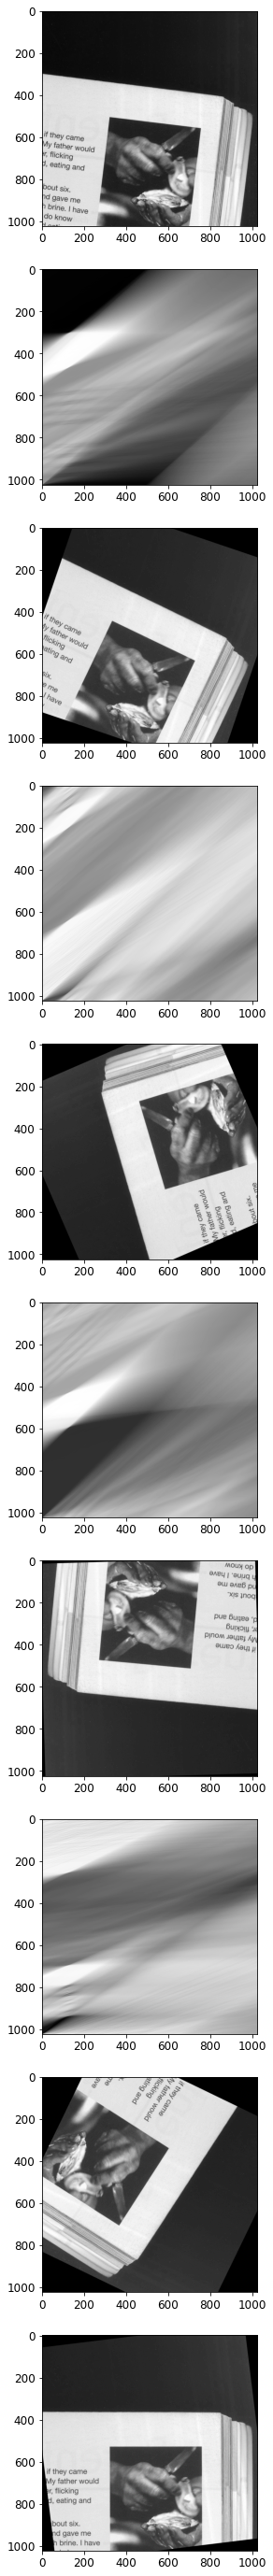

In [17]:
import numpy as np
def HFT(img, xmin, xmax):
    W = img.shape[0]
    res = np.zeros([W, xmax-xmin])
    if xmax - xmin == 1:
        res[:, 0] = img[:, xmin]
    else:
        mid = (xmin + xmax) // 2
        ans1 = calc_sums(img, xmin, mid)
        ans2 = calc_sums(img, mid, xmax)
        for x in range(W):
            for shift in range(xmax-xmin):
                res[x, shift] = ans1[x, shift//2] + ans2[(x + shift//2 + shift%2) % W, shift//2]
    return res


def process_algo(img):
    W = img.shape[0]
    half_W = W // 2 
    res = HFT(img, 0, W)
    res_norm = res
    max_ind = np.argmax(np.var(res_norm, axis=1))
    print(np.var(res_norm, axis=1))
    print(np.max(np.var(res_norm, axis=1)))
    print(max_ind)
    rotate_degree_algo = ((max_ind - half_W)/ (float)(half_W)) * 45.
    return res_norm, rotate_degree_algo

def work(img, th=500, axes=None, is_rotated=False):
    
    axes_n = 10 if is_rotated else 4
    if axes is None:
        fig, axes = plt.subplots(axes_n, figsize=(10, axes_n*5))
    
    show_img(img, ax=axes[0])
    if is_rotated:
        for i in range(4):
            res, rotate_degree_algo = process_algo(rotate_image(img, 90*i))
            show_img(res, ax=axes[i*2+1])
            rot_img = rotate_image(img, rotate_degree_algo + 90*i)
            print(f'Algo rotate: {rotate_degree_algo + 90*i}')
            show_img(rot_img, ax=axes[i*2+2])
        ax_next = 9
    else:        
        res, rotate_degree_algo = process_algo(img)
        show_img(res, ax=axes[1])
        print(f'Algo rotate: {rotate_degree_algo}')
        rot_img = rotate_image(img, rotate_degree_algo)
        show_img(rot_img, ax=axes[2])
        ax_next = 3

    theta_cv = make_cv2_haf(src, th=th, do_print=False)
    rotate_degree_cv = theta_cv * (180./np.pi)
    print(f'CV2 rotate: {rotate_degree_cv}')
    rot_img_cv = rotate_image(img, rotate_degree_cv)
    show_img(rot_img_cv, ax=axes[ax_next])
src = images[7][:,:,0]
img = src[:1024,-1024:]

work(img, th=200, is_rotated=True)

In [ ]:
fig, axes = plt.subplots(10, 4, figsize=(30, 60))
fig.suptitle('Иcходник|Суммы пространства хафа по диадическим прямым|Мой hft|cv2 реализация hft', fontsize=30)
for i in range(10):
    src = images[i][:,:,0]
    if src.shape[0] < 1024 or src.shape[1] < 1024:
        continue
    print(img.shape)
    img = src[:1024,-1024:]
    work(img, axes=axes[i,:], th=200)

(1024, 1024)
[7.66521079e+08 7.67680698e+08 7.68838413e+08 ... 7.06311244e+08
 7.21677902e+08 7.44380460e+08]
822239164.9335938
43
Algo rotate: -41.220703125
1.8151424
CV2 rotate: 103.99999834060421
(1024, 1024)
[1.13658666e+08 1.13804134e+08 1.13620770e+08 ... 1.00738661e+08
 1.03675921e+08 1.08458661e+08]
113804133.51100063
1
Algo rotate: -44.912109375
0.7853982
CV2 rotate: 82.00000000512816
(1024, 1024)
[2.13474617e+08 2.14690991e+08 2.16131003e+08 ... 2.03295420e+08
 2.06033982e+08 2.09600016e+08]
275666113.2088995
60
Algo rotate: -39.7265625
0.7853982
CV2 rotate: 72.99999633958576
(1024, 1024)
[1.43970673e+09 1.42649598e+09 1.41321731e+09 ... 1.11049836e+09
 1.18859748e+09 1.31199893e+09]
1439706734.996181
0
Algo rotate: -45.0
0.7853982
CV2 rotate: 173.99999801180195
(1024, 1024)
